<a href="https://colab.research.google.com/github/itzelts/2025-AM158-PSETS/blob/main/AM158_PSET1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Set 1 — Four Problems in Dynamic Programming

*Markov Decision Processes & DP Methods*

**Due: September 26 (Friday), 11:59pm**

### Problem 1 — Inscribed Polygon of Maximum Perimeter (Pen & Paper)
TODO list:
- (a) show Q-value function $Q_{N-1}$ (6pt)
- (b) show convexity (6pt)
- (c) show optimal control signal $u_{N-1}$ (6pt)
- (d) induction to any $k$-th step Q-function $Q_k$ (6pt)
- (e) show all optimal control signal $u_k$ (6pt)

Bonus:
- (f) show convexity (5pt)
- (g)(coding) solve the problem using optimization (5pt)
### Problem 2 — Proof of convergence of value iteration (Pen & Paper)
TODO list:
- 2.1 contraction of bellman operator (5pt)
- 2.2 linear convergence (5pt)
- 2.3 stoping criteria (5pt)
- 2.4 iteration bound (5pt)
### Problem 3 — Cliffwalk (coding)
TODO list:
- 3.2 fill in code for policy evaluation (10pt)
- 3.3 fill in code for policy iteration (10pt)
- 3.4 fill in code for value iteration (10pt)

### Problem 4 — Matrix–Vector Representation of DP
TODO list:
- 4.1 build the transition matrix $P$ (5pt)
- 4.2 write bellman equation as matrix form (5pt)
- 4.3 solve the matrix equation by fix-point iteration (10pt)

## 1. Inscribed Polygon of Maximal Perimeter (Pen and Paper)

In lectures, we have seen how dynamic programming (DP) can compute optimal value functions and optimal policies for finite-horizon MDPs with discrete state space and action space (i.e., the tabular case).

In this exercise, we will see that DP can also solve an optimal control problem with continuous state space and action space.
This problem is a geometry problem where we try to find the $N$-side polygon inscribed inside a circle with maximum perimeter. We will walk you through the key steps of formulating and solving the problem, while leaving a few mathematical details for you to fill in.

Given a circle with radius $1$, we can randomly choose $N$ distinct points on the circle to form a polygon with $N$ vertices and sides, as shown in Fig. 1 with $N=3,4,5$.

<figure style="text-align:center;">
  <img src="https://raw.githubusercontent.com/ComputationalRobotics/2025-ES-AM-158-PSET/main/PSET1/polygon-inside-circle.png" width="600" alt="Inscribed polygon">
  <figcaption style="color:#6a737d; font-style:italic;">
    Figure 1. Polygons inscribed inside a circle
  </figcaption>
</figure>

Once the $N$ points are chosen, the $N$-polygon will have a perimeter, i.e., the sum of the lengths of its edges.

What is the configuration of the $N$ points such that the resulting $N$-polygon has the maximum perimeter? We claim that the answer is when the $N$-polygon has edges of equal lengths, or in other words, when the $N$ points are placed on the circle evenly.

Let us use dynamic programming to prove the claim.

To use dynamic programming, we need to define a dynamical system and a reward function.

<figure style="text-align:center;">
  <img src="https://raw.githubusercontent.com/ComputationalRobotics/2025-ES-AM-158-PSET/main/PSET1/sequential-placement-N-point.png" width="360" alt="Inscribed polygon">
  <figcaption style="color:#6a737d; font-style:italic;">
    Figure 2. Sequential placement of N points on the circle.
  </figcaption>
</figure>

**Dynamical system.**


We will use $\{x_1, \ldots, x_N\}$ to denote the angular positions of the $N$ points to be placed on the circle (with slight abuse of notation, we will call each of those points $x_k$ as well). In particular, as shown in Fig. 2, let us use $x_k$ to denote the angle between the line $O — x_k$ and the vertical line (O is the center of the circle), with zero angle starting at 12 o’clock and clockwise being positive. Without loss of generality, we assume $x_1 = 0$. (if $x_1$ is nonzero, we can always rotate the entire circle so that $x_1 = 0$).

After the $k$-th point is placed, we can “control” where the next point $x_{k+1}$ will be, by deciding the incremental angle between $x_{k+1}$ and $x_k$, denoted as $u_k > 0$ in Fig. 2. This is simply saying the dynamics is

$$
x_{k+1} = x_k + u_k, \quad k=1,\ldots,N-1, \quad x_1 = 0.
$$

Notice here we did not use an MDP to formulate this problem because the dynamics is deterministic. In the MDP language, this would correspond to, at time step $k$, if the agent takes action $u_k$ at state $x_k$, then the probability of transitioning to state $x_k + u_k$ at time $k+1$ is $1$, and the probability of transitioning to other states is zero.


**Reward.**


The perimeter of the $N$-polygon is therefore

$$
g_N(x_N) + \sum_{k=1}^{N-1} g_k(x_k,u_k),
$$

with the terminal reward

$$
g_N(x_N) = 2 \sin\left(\frac{2\pi-x_N}{2}\right),
$$

the distance between $x_N$ and $x_1$ (see Fig. 2), and the running reward

$$
g_k(x_k,u_k) = 2 \sin\left(\frac{u_k}{2}\right).
$$

**Dynamic programming.**

We are now ready to invoke dynamic programming. Recall in lectures the key steps of DP are first to initialize the optimal value functions at the terminal time $k=N$, and then perform backward recursion to compute the optimal value functions at time $k=N-1,\dots,1$.

We start by setting

$$
V_N(x_N) = g_N(x_N) = 2 \sin\left(\frac{2\pi-x_N}{2}\right).
$$

Unlike in lectures where we initialized the terminal value functions as all zero, here we initialize the terminal value functions as $g_N(x_N)$ because there is a "terminal-state" reward.

We then compute $V_{N-1}(x_{N-1})$ as

$$
V_{N-1}(x_{N-1})
= \max_{0 < u_{N-1} < 2\pi-x_{N-1}}
\left\{
  \underbrace{ 2 \sin\left(\tfrac{u_{N-1}}{2}\right) + V_N(x_{N-1} + u_{N-1}) }_{Q_{N-1}(x_{N-1}, u_{N-1})}
\right\},
\tag{9.1}
$$

where $u_{N-1} < 2\pi-x_{N-1}$ because we do not want $x_N$ to cross $2\pi$.


**a**. Show that

$$
Q_{N-1}(x_{N-1}, u_{N-1})
= 2 \sin\left(\tfrac{u_{N-1}}{2}\right)
+ 2 \sin\left(\tfrac{2\pi-x_{N-1}-u_{N-1}}{2}\right),
$$

and thus

$$
\frac{\partial Q_{N-1}(x_{N-1}, u_{N-1})}{\partial u_{N-1}}
= \cos\left(\tfrac{u_{N-1}}{2}\right)
- \cos\left(\tfrac{2\pi-x_{N-1}-u_{N-1}}{2}\right).
$$

**(TODO) ANSWER:**


By definition (deterministic dynamics),
\begin{align}
Q_{N-1}(x_{N-1},u_{N-1})
&=g_{N-1}(x_{N-1},u_{N-1})+J_N(x_{N})\\
&=g_{N-1}(x_{N-1},u_{N-1})+g_N(x_{N})\\
&=2\sin\!\Big(\frac{u_{N-1}}{2}\Big)+2\sin\!\Big(\frac{2\pi-x_{N}}{2}\Big)\\
&=2\sin\Big(\frac{u_{N-1}}{2}\Big)+2\sin\!\Big(\frac{2\pi-x_{N-1}-u_{N-1}}{2}\Big)
\end{align}

For $x_{N-1}\in(0,\pi)$ and $u_{N-1}\in(0,2\pi-x_{N-1})$, we differentiate wrt $u_{N-1}$ such that
$$
\frac{\partial Q_{N-1}}{\partial u_{N-1}}
=\cos\!\Big(\frac{u_{N-1}}{2}\Big)
-\cos\!\Big(\frac{2\pi-x_{N-1}-u_{N-1}}{2}\Big)
$$
using $\frac{d}{du}\,2\sin(u/2)=\cos(u/2)$.



**b**. Show that $Q_{N-1}(x_{N-1}, u_{N-1})$ is concave (i.e., $-Q_{N-1}(x_{N-1}, u_{N-1})$ is convex) in $u_{N-1}$ for every $x_{N-1} \in (0, \pi)$ and $u_{N-1} \in (0, 2\pi-x_{N-1})$.
(Hint: compute the second derivative of $Q_{N-1}(x_{N-1}, u_{N-1})$ with respect to $u_{N-1}$ and verify it is positive definite)

**(TODO) ANSWER:**

We compute the second derivative
$$
\frac{\partial^2 Q_{N-1}}{\partial u_{N-1}^2}
=-\frac12\sin\!\Big(\frac{u_{N-1}}{2}\Big)-\frac12\sin\!\Big(\frac{2\pi-x_{N-1}-u_{N-1}}{2}\Big)
$$
On the domain $x_{N-1}\in(0,\pi)$ and $u_{N-1}\in(0,2\pi-x_{N-1})$, both angles
$\tfrac{u_{N-1}}{2}$ and $\tfrac{2\pi-x_{N-1}-u_{N-1}}{2}$ lie in $(0,\pi)$, so their sines are strictly positive and $\partial^2 Q_{N-1}/\partial u_{N-1}^2<0$. Therefore $Q_{N-1}$ is strictly concave in $u_{N-1}$ (or $-Q_{N-1}$ is strictly convex and thus $\partial^2 Q_{N-1}/\partial u_{N-1}^2$ is positive definite).



**c**. With a and b, show that the optimal $u_{N-1}$ that solves (9.1) is

$$
u_{N-1}^\star = \frac{2\pi-x_{N-1}}{2},
$$

and therefore

$$
J_{N-1}(x_{N-1}) = 4 \sin\left(\tfrac{2\pi-x_{N-1}}{4}\right).
$$

(Hint: the point at which a concave function’s gradient vanishes must be the unique maximizer of that function.)

**(TODO) ANSWER:**

By (a), the first-order condition $\frac{\partial Q_{N-1}}{\partial u_{N-1}}=0$ yields
$$
\cos\!\Big(\frac{u_{N-1}}{2}\Big)=\cos\!\Big(\frac{2\pi-x_{N-1}-u_{N-1}}{2}\Big)
$$
On $(0,\pi)$ the cosine is strictly decreasing, hence the angles are equal and we can solve
\begin{align}\frac{u_{N-1}}{2} &=\frac{2\pi-x_{N-1}-u_{N-1}}{2}\\ \frac{u_{N-1}}{2} &= \frac{2\pi-x_{N-1}}{2} - \frac{u_{N-1}}{2}\\ u_{N-1} &= \frac{2\pi-x_{N-1}}{2}
\end{align}
By strict concavity (b), this stationary point is the unique maximizer and so we have $$
u_{N-1}^\star = \frac{2\pi-x_{N-1}}{2}
$$

Evaluating the objective at $u_{N-1}^\star$, using $$V_{N-1}(x_{N-1})
= \max_{0 < u_{N-1} < 2\pi-x_{N-1}}
\left\{
  \underbrace{ 2 \sin\left(\tfrac{u_{N-1}}{2}\right) + V_N(x_{N-1} + u_{N-1}) }_{Q_{N-1}(x_{N-1}, u_{N-1})}
\right\}\\ $$ and $$Q_{N-1}(x_{N-1},u_{N-1}) = 2\sin\Big(\frac{u_{N-1}}{2}\Big)+2\sin\!\Big(\frac{2\pi-x_{N-1}-u_{N-1}}{2}\Big)$$ we have
\begin{align}
J_{N-1}(x_{N-1})
&=\max_{u_{N-1}} Q_{N-1}(x_{N-1},u_{N-1})\\ &= Q_{N-1}(x_{N-1},\frac{2\pi-x_{N-1}}{2}) \\
&=2\sin\!\Big(\frac{\frac{2\pi-x_{N-1}}{2}}{2}\Big)+2\sin\!\Big(\frac{2\pi-x_{N-1} - \frac{2\pi-x_{N-1}}{2}}{2}\Big)\\
&=2\sin\!\Big(\frac{2\pi-x_{N-1}}{4}\Big)+2\sin\!\Big(\frac{2\pi-x_{N-1}}{4}\Big)\\
&={4\sin\!\Big(\frac{2\pi-x_{N-1}}{4}\Big)}
\end{align}



**d**. Now use induction to show that the $k$-th step dynamic programming

$$
J_k(x_k)
= \max_{0 < u_k < 2\pi — x_k}
\left\{ 2 \sin\left(\tfrac{u_k}{2}\right) + J_{k+1}(x_k + u_k) \right\}
$$

admits an optimal control

$$
u_k^\star = \frac{2\pi-x_k}{N-k + 1},
$$

and optimal cost-to-go

$$
J_k(x_k) = 2 (N-k + 1) \, \sin\!\left( \frac{2\pi-x_k}{2 (N-k + 1)} \right).
$$

**(TODO) ANSWER:**


Base case $k=N-1$: From part (c) we have $$
u_{N-1}^\star = \frac{2\pi-x_{N-1}}{2},
$$
and
$$
J_{N-1}(x_{N-1}) = 4 \sin\left(\tfrac{2\pi-x_{N-1}}{4}\right)
$$
which matches the formulas for k = N - 1 so the base case holds.



Inductive step: Assume this hold for $k+1$ such that
$$
u_{k+1}^\star = \frac{2\pi-x_{k+1}}{N-(k+1)+ 1} = \frac{2\pi - x_{k+1}}{N-k}
$$
and
$$
J_{k+1}(x_{k+1}) = 2 (N- (k+1) + 1) \, \sin\!\left( \frac{2\pi-x_{k+1}}{2 (N- (k+1) + 1)} \right) =  2 (N - k) \, \sin\!\left( \frac{2\pi-x_{k+1}}{2 (N- k)} \right)
$$


Inductive Step: We want to show that this holds for k. Here, the Bellman equation gives
\begin{align}
J_k(x_k)
&= \max_{0 < u_k < 2\pi — x_k}
\left\{ 2 \sin\left(\tfrac{u_k}{2}\right) + J_{k+1}(x_k + u_k) \right\}\\
&=  \max_{0 < u_k < 2\pi — x_k}
\left\{ 2 \sin\left(\tfrac{u_k}{2}\right) + J_{k+1}(x_{k+1}) \right\}\\
&= \max_{0 < u_k < 2\pi — x_k}
\left\{ 2 \sin\left(\tfrac{u_k}{2}\right) + 2 (N - k) \, \sin\!\left( \frac{2\pi-x_{k+1}}{2 (N- k)} \right)\right
\}
\end{align}
Let $Q_k(x_k, u_k) = 2\sin\left(\frac{u_k}{2}\right) + 2(N-k)\sin\left(\frac{2\pi-x_{k+1}}{2(N-k)}\right)$


Taking the first derivative we have
\begin{align}
\frac{\partial Q_k}{\partial u_{N-1}}&= \cos\!\Big(\frac{u_{k}}{2}\Big)
-\cos\!\Big(\frac{2\pi-x_{k+1}}{2(N-k)}\Big)
\end{align}
and setting to zero we have
\begin{align}
\\  \cos\!\Big(\frac{u_{k}}{2}\Big) &= \cos\!\Big(\frac{2\pi-x_{k+1}}{2(N-k)}\Big)\\ \frac{u_{k}}{2} &= \frac{2\pi-x_{k+1}}{2(N-k)}
\\ \frac{u_{k}}{2} &= \frac{2\pi-x_{k}- u_{k}}{2(N-k)}
\\  u_k (N - k +1) &= 2\pi-x_{k}
\\ u_k &= \frac{2\pi-x_k}{N-k + 1}
\end{align}
To verify this is a maximum, the second derivative is: $$\frac{\partial^2 Q_k}{\partial u_k^2} = -\frac{1}{2}\sin\left(\frac{u_k}{2}\right) - \frac{1}{2(N-k)}\sin\left(\frac{2\pi-x_k-u_k}{2(N-k)}\right) < 0$$
So we see that this maximum and so we have that
$$
u_k^\star = \frac{2\pi-x_k}{N-k + 1}
$$
which is what we wanted.

Now, substituting $u_k^* = \frac{2\pi-x_k}{N-k+1}$ back into $J_k$:
$$J_k(x_k) = 2\sin\left(\frac{2\pi-x_k}{2(N-k+1)}\right) + 2(N-k)\sin\left(\frac{2\pi-x_k-\frac{2\pi-x_k}{N-k+1}}{2(N-k)}\right)$$ For the second term we have
 $$2\pi-x_k-\frac{2\pi-x_k}{N-k+1} = (2\pi-x_k)\left(1-\frac{1}{N-k+1}\right) = (2\pi-x_k)\frac{N-k}{N-k+1}$$
So $$\frac{2\pi-x_k-\frac{2\pi-x_k}{N-k+1}}{2(N-k)} = \frac{(2\pi-x_k)\frac{N-k}{N-k+1}}{2(N-k)} = \frac{2\pi-x_k}{2(N-k+1)}$$
Therefore $$V_k(x_k) = 2\sin\left(\frac{2\pi-x_k}{2(N-k+1)}\right) + 2(N-k)\sin\left(\frac{2\pi-x_k}{2(N-k+1)}\right)$$ $$= 2(1 + N-k)\sin\left(\frac{2\pi-x_k}{2(N-k+1)}\right)$$ $$= 2(N-k+1)\sin\left(\frac{2\pi-x_k}{2(N-k+1)}\right)$$
which is what we wanted!



**e**. Starting from $x_1 = 0$, what is the optimal sequence of controls?

Hopefully now you see why my original claim is true!

**(TODO) ANSWER:**



From part (d) we have, for each stage $k=1,\dots,N-1$,
$$
u_k^\star \;=\; \frac{2\pi - x_k}{N-k+1}
$$
Starting at $x_1=0$, the first control is
$$
u_1^\star \;=\; \frac{2\pi - 0}{N} \;=\; \frac{2\pi}{N}
$$
$$
x_2 \;=\; x_1 + u_1^\star \;=\; \frac{2\pi}{N}
$$
Applying the same formula at $k=2$ gives
$$
u_2^\star \;=\; \frac{2\pi - x_2}{N- 2 + 1}
= \frac{2\pi - \frac{2\pi}{N}}{N-1}
= \frac{N2\pi - 2\pi}{N} * \frac{1}{N-1}
= \frac{2\pi}{N}
$$
$$
x_3 \;=\; x_2 + u_2^\star \;=\; \frac{4\pi}{N}
$$
and again
$$
u_3^\star \;=\; \frac{2\pi - x_3}{N- 3 + 1}
= \frac{2\pi - \frac{4\pi}{N}}{N-2}
= \frac{N2\pi - 4\pi}{N} * \frac{1}{N-2}
= \frac{2\pi}{N}
$$
$$
x_4 \;=\; x_3 + u_3^\star \;=\; \frac{6\pi}{N}
$$
Then we see that we have
$$
\;u_1^\star = u_2^\star = \cdots = u_{N-1}^\star = \frac{2\pi}{N}\;
$$
and hence the optimal angles (states) are evenly spaced
$$
\;x_k^\star \;=\; \sum_{i=1}^{k-1} u_i^\star \;=\; \frac{2\pi}{N}(k-1)
\qquad k=1,\dots,N\;
$$
Thus the $N$ points lie at angles $\{0,\frac{2\pi}{N},\frac{4\pi}{N},\ldots,\frac{2\pi(N-1)}{N}\}$ and they form a regular $N$-gon.


### Bonus:
We are not yet done for this exercise. Since you have probably already spent quite some time on this exercise, I will leave the rest of the exercise a bonus. In case you found this simple geometric problem interesting, you should keep reading as we will use numerical techniques to prove the same claim.

In Fig. 2, by denoting

$$
u_N = 2\pi - x_N = 2\pi - (u_1 + \cdots + u_{N-1})
$$

as the angle between the line $O — x_N$ and the line $O — x_1$, it is not hard to observe that the perimeter of the $N$-polygon is

$$
\sum_{k=1}^N 2 \sin\!\left(\tfrac{u_k}{2}\right).
$$

Consequently, to maximize the perimeter, we can formulate the following optimization

$$
\max_{u_1,\ldots,u_N} \;\; \sum_{k=1}^N 2 \sin\!\left(\tfrac{u_k}{2}\right)
$$

subject to

$$
u_k > 0, \; k = 1, \ldots, N, \\
u_1 + \cdots + u_N = 2\pi
\tag{9.2}
$$

where $u_k$ can be seen as the angle spanned by the line $x_k — x_{k+1}$ with respect to the center $O$ so that they are positive and sum up to $2\pi$.



**f**. Show that the optimization (9.2) is convex.
(Hint: first show the feasible set is convex, and then show the objective function is concave over the feasible set.)

**(TODO) ANSWER:**


Consider the constraints
$$
\max_{u\in\mathbb{R}^N}\;\; F(u):=\sum_{k=1}^{N} 2\sin\!\Big(\frac{u_k}{2}\Big)
$$
$$
\text{s.t. } u_k>0\ (k=1,\dots,N),\;\; \sum_{k=1}^{N} u_k = 2\pi
$$

We show that the feasible set is convex. Let
$$
U\;=\;\Big\{u\in\mathbb{R}^N:\ u_k>0\ \forall k,\ \sum_{k=1}^N u_k=2\pi\Big\}.
$$
The half-space constraints $u_k>0$ define the open positive orthant, which is convex, and
$\sum_{k=1}^N u_k=2\pi$ is an affine and thus convex  hyperplane. The intersection of convex
sets is convex, so U is convex.


Now we show that the objective is concave on the feasible set.
Define $f(u):=2\sin(u/2)$ for $u\in(0,2\pi)$. Then
$$
f'(u)=\cos\!\Big(\frac{u}{2}\Big),
\qquad
f''(u)=-\frac{1}{2}\sin\!\Big(\frac{u}{2}\Big).
$$
On the feasible set we have $u_k\in(0,2\pi)$ for all $k$, so $\sin(u_k/2)>0$ and hence
$f''(u_k)<0$. Therefore $f$ is strictly concave on $(0,2\pi)$.

The objective
$$
F(u)=\sum_{k=1}^{N} f(u_k)
$$
is a separable sum of concave functions and is therefore concave on U.

9.2 maximizes a concave objective over a convex feasible set, ansd so equivalently,
minimizing $-F(u)$ over U has a convex objective. Hence 9.2 is a convex optimization problem.


Now that we have shown (9.2) is a convex optimization problem, we know that pretty much any numerical algorithm will guarantee convergence to the globally optimal solution.

There are many numerical algorithms that can compute optimal solutions of an optimization problem (Nocedal and Wright 1999). Python provides a nice interface, `scipy.optimize`, to many such algorithms, and let us use `scipy.optimize` to solve (9.2) so we can numerically prove our claim.


**g**. We have provided most of the code necessary for solving (9.2) below. Please fill in the definition of the function `perimeter(u)`, and then run the code. Show your results for $N = 3, 10, 100$. Do the solutions obtained from Python verify our claim?

Optimization terminated successfully    (Exit mode 0)
            Current function value: -5.196152422706629
            Iterations: 9
            Function evaluations: 36
            Gradient evaluations: 9
Success: True | message: Optimization terminated successfully
Perimeter = 5.196152422706629


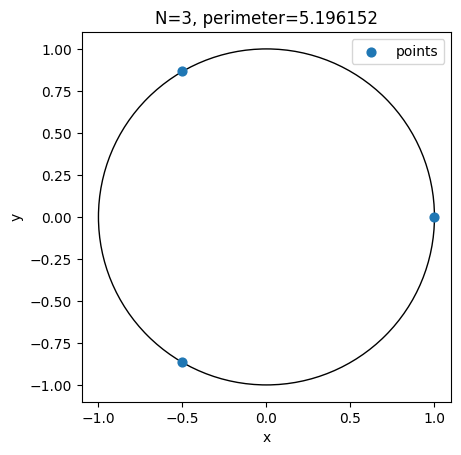

In [11]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# -------- Parameters --------
N = 3  # Number of points

# -------- Objective: polygon perimeter on the unit circle (edge length = 2*sin(u/2)) --------
def perimeter(u):
    ##############################
    # TODO BLOCK
    ##############################
    return np.sum(2 * np.sin(u/2))

def neg_perimeter(u):
# SciPy minimizes; negate to perform maximization
    return -perimeter(u)

# -------- Constraints & initialization --------
# Linear equality: sum(a) = 2π
eq_cons = {'type': 'eq', 'fun': lambda u: np.sum(u) - 2.0 * np.pi}

# Bounds: u_i ∈ [0, 2π] (upper bound helps numerics)
bounds = [(0.0, 2.0 * np.pi)] * N

# Initial guess: positive random vector normalized to 2π
rng = np.random.default_rng(0)
u0 = rng.random(N)
u0 = u0 / u0.sum() * 2.0 * np.pi

# -------- Solve (SLSQP) --------
res = minimize(
    neg_perimeter, u0,
    method='SLSQP',
    bounds=bounds,
    constraints=[eq_cons],
    options={'maxiter': 2000, 'ftol': 1e-12, 'disp': True}
)

uopt = res.x
print("Success:", res.success, "| message:", res.message)
print("Perimeter =", perimeter(uopt))

# -------- Recover vertex angles x by cumulative sum (x[0]=0; others accumulate preceding gaps) --------
x = np.zeros(N)
x[1:] = np.cumsum(uopt[:-1])

# -------- Plot --------
fig, ax = plt.subplots()
# Draw unit circle
circle = plt.Circle((0, 0), 1.0, fill=False)
ax.add_patch(circle)

# Scatter vertices
ax.scatter(np.cos(x), np.sin(x), s=40, label="points")

ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(f"N={N}, perimeter={perimeter(uopt):.6f}")
ax.legend()
plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -6.1803398874986435
            Iterations: 10
            Function evaluations: 110
            Gradient evaluations: 10
Success: True | message: Optimization terminated successfully
Perimeter = 6.1803398874986435


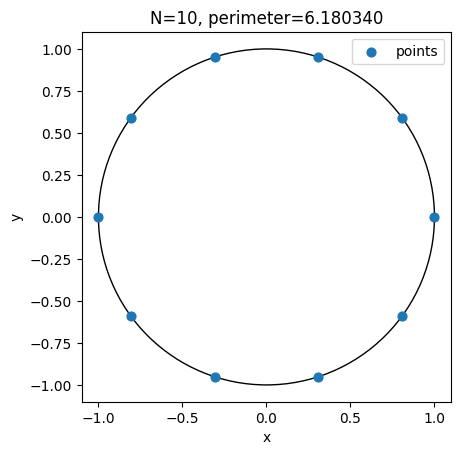

In [12]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# -------- Parameters --------
N = 10  # Number of points

# -------- Objective: polygon perimeter on the unit circle (edge length = 2*sin(u/2)) --------
def perimeter(u):
    ##############################
    # TODO BLOCK
    ##############################
    return np.sum(2 * np.sin(u/2))

def neg_perimeter(u):
# SciPy minimizes; negate to perform maximization
    return -perimeter(u)

# -------- Constraints & initialization --------
# Linear equality: sum(a) = 2π
eq_cons = {'type': 'eq', 'fun': lambda u: np.sum(u) - 2.0 * np.pi}

# Bounds: u_i ∈ [0, 2π] (upper bound helps numerics)
bounds = [(0.0, 2.0 * np.pi)] * N

# Initial guess: positive random vector normalized to 2π
rng = np.random.default_rng(0)
u0 = rng.random(N)
u0 = u0 / u0.sum() * 2.0 * np.pi

# -------- Solve (SLSQP) --------
res = minimize(
    neg_perimeter, u0,
    method='SLSQP',
    bounds=bounds,
    constraints=[eq_cons],
    options={'maxiter': 2000, 'ftol': 1e-12, 'disp': True}
)

uopt = res.x
print("Success:", res.success, "| message:", res.message)
print("Perimeter =", perimeter(uopt))

# -------- Recover vertex angles x by cumulative sum (x[0]=0; others accumulate preceding gaps) --------
x = np.zeros(N)
x[1:] = np.cumsum(uopt[:-1])

# -------- Plot --------
fig, ax = plt.subplots()
# Draw unit circle
circle = plt.Circle((0, 0), 1.0, fill=False)
ax.add_patch(circle)

# Scatter vertices
ax.scatter(np.cos(x), np.sin(x), s=40, label="points")

ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(f"N={N}, perimeter={perimeter(uopt):.6f}")
ax.legend()
plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: -6.282151815623602
            Iterations: 21
            Function evaluations: 2121
            Gradient evaluations: 21
Success: True | message: Optimization terminated successfully
Perimeter = 6.282151815623602


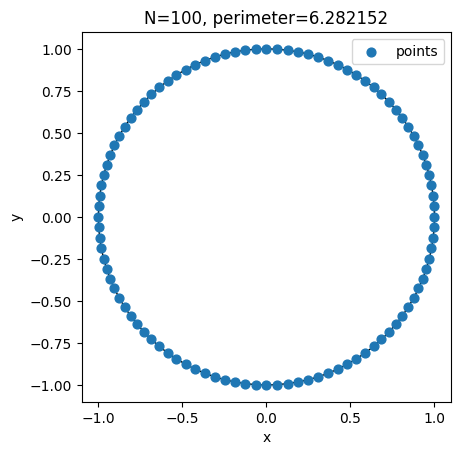

In [13]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# -------- Parameters --------
N = 100  # Number of points

# -------- Objective: polygon perimeter on the unit circle (edge length = 2*sin(u/2)) --------
def perimeter(u):
    ##############################
    # TODO BLOCK
    ##############################
    return np.sum(2 * np.sin(u/2))

def neg_perimeter(u):
# SciPy minimizes; negate to perform maximization
    return -perimeter(u)

# -------- Constraints & initialization --------
# Linear equality: sum(a) = 2π
eq_cons = {'type': 'eq', 'fun': lambda u: np.sum(u) - 2.0 * np.pi}

# Bounds: u_i ∈ [0, 2π] (upper bound helps numerics)
bounds = [(0.0, 2.0 * np.pi)] * N

# Initial guess: positive random vector normalized to 2π
rng = np.random.default_rng(0)
u0 = rng.random(N)
u0 = u0 / u0.sum() * 2.0 * np.pi

# -------- Solve (SLSQP) --------
res = minimize(
    neg_perimeter, u0,
    method='SLSQP',
    bounds=bounds,
    constraints=[eq_cons],
    options={'maxiter': 2000, 'ftol': 1e-12, 'disp': True}
)

uopt = res.x
print("Success:", res.success, "| message:", res.message)
print("Perimeter =", perimeter(uopt))

# -------- Recover vertex angles x by cumulative sum (x[0]=0; others accumulate preceding gaps) --------
x = np.zeros(N)
x[1:] = np.cumsum(uopt[:-1])

# -------- Plot --------
fig, ax = plt.subplots()
# Draw unit circle
circle = plt.Circle((0, 0), 1.0, fill=False)
ax.add_patch(circle)

# Scatter vertices
ax.scatter(np.cos(x), np.sin(x), s=40, label="points")

ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(f"N={N}, perimeter={perimeter(uopt):.6f}")
ax.legend()
plt.show()

## 2. Convergence proof of Value iteration

Let the Bellman optimality operator be
$$
(T^\star V)(s)=\max_a\Big[\,R(s,a)+\gamma\sum_{s'}P(s'|s,a)V(s')\,\Big],
\qquad \gamma\in[0,1).
$$
Let $V^\star$ denote the optimal value function, i.e., $V^\star=T^\star V^\star$.
Value iteration is $V_{k+1}=T^\star V_k$.

### 2.1 Contraction

We first prove the operator is a $\gamma$-**contraction**, i.e.
$$
||V_{k+1}-V^\star|| \leq \gamma ||V_k-V^\star||
$$

**(TODO) Answer:**


For any $s \in S$,
\begin{align}
|(T^\*V_k)(s)-(T^\*V^\*)(s)|
&= \Big|\max_a \big(R(s,a)+\gamma \sum_{s'} P(s'|s,a) V_k(s')\big) \\
&\quad - \max_a \big(R(s,a)+\gamma \sum_{s'} P(s'|s,a) V^\*(s')\big)\Big| \\
&\le \max_a\Big|\gamma \sum_{s'} P(s'|s,a)\big(V_k(s') - V^\*(s')\big)\Big| \\
&\le \gamma \max_a \Big|\sum_{s'} P(s'|s,a)\Big(V_k(s')-V^\*(s')\Big)\Big| \\
&\le \gamma \max_a \sum_{s'} P(s'|s,a)\Big|V_k(s')-V^\*(s')\Big| \\
&\le \gamma \max_a  \|V_k-V^\*\|_\infty \sum_{s'} P(s'|s,a)\\
&\le \gamma \max_a  \|V_k-V^\*\|_\infty * 1\\
&\le \gamma \,\|V_k-V^\*\|_\infty
\end{align}
Taking $\max_s$ yields $\|T^\*V_k-T^\*V^\*\|_\infty \le \gamma \|V_k-V^\*\|_\infty$ and so $\|V_{k+1}-V^\*\|_\infty \le \gamma \|V_k-V^\*\|_\infty$

### 2.2 linear convergence
Next we prove the convergence is actually **linear**, i.e.
$$
\|V_k-V^\star\|_\infty \leq \gamma^k \|V_0-V^\star\|_\infty
$$

**(TODO) Answer:**

We prove by induction.
Base case $k=0$ holds with equality.

If $\|V_k - V^\*\|_\infty \le \gamma^k \|V_0 - V^\*\|_\infty$, then using 2.1
$$
\|V_{k+1}-V^\*\|_\infty \le \gamma \|V_k - V^\*\|_\infty \le \gamma * \gamma^{k}\|V_0 - V^\*\|_\infty = \gamma^{k+1}\|V_0 - V^\*\|_\infty
$$
Thus the bound holds for all $k$ by induction.

### 2.3 Practical stopping rule

In practice we never know what is the true $V^\star$. But what we can calculate is the difference between two iterations. Here we (1) prove an error bound of $\|V-V^\star\|_\infty$ by $\|V_{k+1} - V_k\|_\infty$:

$$
\|V_k-V^\star\|_\infty \leq \frac{\|V_{k+1} - V_k\|_\infty}{1-\gamma}
$$

and (2) Compute the tolerance on the consecutive-iterate gap $\|V_{k+1}-V_k\|_\infty$ needed to guarantee $\|V - V^\star\|_\infty \le 10^{-6}$ when $\gamma=0.99$.

**(TODO) Answer:**

Define the Bellman residual at step $k$ by
$$
\delta_k := \|T^\* V_k - V_k\|_\infty \;=\; \|V_{k+1}-V_k\|_\infty
$$

Error bound via the residual.
\begin{align}
\|V_k - V^\*\|_\infty
&= \|V_k - T^\* V^\*\|_\infty \\
&\le \|V_k - T^\* V_k\|_\infty + \|T^\* V_k - T^\* V^\*\|_\infty \\
&\le \delta_k + \gamma \|V_k - V^\*\|_\infty
\\ \;\|V_k - V^\*\|_\infty \; -   \gamma \|V_k - V^\*\|_\infty &\le \|V_{k+1}-V_k\|_\infty
\\ ( 1 - \gamma) \|V_k - V^\*\|_\infty &\le\; \|V_{k+1}-V_k\|_\infty
\\ \\\|V_k - V^\*\|_\infty &\le\; \frac{\|V_{k+1}-V_k\|_\infty}{1-\gamma}\;
\end{align}
using the results from 2.1


Tolerance for $\gamma=0.99$ and $\|V_k - V^\*\|_\infty \le 10^{-6}$.
We require that
$$
\frac{\|V_{k+1}-V_k\|_\infty}{1-\gamma} \;\le\; 10^{-6}
$$
$$
\|V_{k+1}-V_k\|_\infty \;\le\; (1-\gamma)\cdot 10^{-6}
$$
With $1-\gamma=0.01$ then we have that
$$
\;\|V_{k+1}-V_k\|_\infty \;\le\; 10^{-8}
$$


### 2.4 The bound of iterations

Assume $\|V_1 - V_0\|_\infty = 1$, $\gamma = 0.99$. How much iterations do we need to have $\|V_k - V^\star\|_\infty \leq 10^{-6}$?

**(TODO) Answer:**

We use the standard tail bound $$
\|V_k - V^\*\|_\infty \;\le\; \sum_{i=k}^{\infty} \|V_{i+1}-V_i\|_\infty
\;\le\; \sum_{i=k}^{\infty} \gamma^{\,i} \|V_1 - V_0\|_\infty
\;=\; \frac{\gamma^{\,k}}{1-\gamma}
$$
Then
$$
\|V_k - V^\*\|_\infty \;\le\; 100 \cdot 0.99^{\,k}.
$$
To achieve $\|V_k - V^\*\|_\infty \le 10^{-6}$, require
\begin{align}
100 \cdot 0.99^{\,k} &\le 10^{-6}\\
0.99^{\,k} &\le 10^{-8}\\
 \frac{\ln(10^{-8})}{\ln(0.99)} \;&\le\; k\\ 1832.84 &\approx k
\end{align}
Hence the minimal integer is
$$
\,k=1833
$$


## 3. Cliffwalk

Implement policy evaluation, policy improvement, value iteration, and policy iteration for the `CliffWalking` task. For clarity and reproducibility, We include a minimal reimplementation of the environment that mirrors Gymnasium’s dynamics and reward scheme.


<figure style="text-align:center;">
  <img src="https://raw.githubusercontent.com/ComputationalRobotics/2025-ES-AM-158-PSET/main/PSET1/cliffwalk.png" width="600" alt="Inscribed polygon">
  <figcaption style="color:#6a737d; font-style:italic;">
    Figure 3. Illustration to cliffwalk problem.
  </figcaption>
</figure>

**CliffWalking (Gym-compatible) — Specification**

- **Grid:** 4 rows × 12 columns (row-major indexing; `state_id = row * 12 + col`; index origin at top-left in comments).
- **Start:** bottom-left cell `(row=3, col=0)`.
- **Goal:** bottom-right cell `(row=3, col=11)`.
- **Actions (4):** up (0), right (1), down (2), left (3).
- **Rewards:** −1 per step; −100 on entering a cliff cell; 0 at the goal.
- **Termination:** episode ends upon reaching the goal; this states are terminal/absorbing. If reaching cliff will go back to start.

**Transition table**

- `P[state][action] → list[(prob, next_state, reward, done)]`
- Deterministic dynamics: each list contains a single tuple with `prob = 1.0` after handling boundaries, cliff, and goal.

In [14]:
import copy
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym

np.set_printoptions(precision=3, suppress=True)

# Create Gym CliffWalking environment (v1).
env_gym = gym.make("CliffWalking-v1", render_mode="ansi")
nS, nA = env_gym.observation_space.n, env_gym.action_space.n
# The CliffWalking grid is 4 × 12; actions are 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT.
print(f"State count={nS}, Action count={nA}")

# -------------------------------------------------------------------
# Utility: pretty-print a value function as a 2D grid (nrow × ncol).
# Values can be any (nS,) array-like; states are indexed row-major:
# State_id = row * ncol + col
# -------------------------------------------------------------------
def print_values(values, nrow: int, ncol: int, title: str = "State Values"):
    """Print a value table in grid form."""
    values = np.asarray(values).reshape(nrow, ncol)
    print(title)
    for r in range(nrow):
        print(" ".join(f"{values[r, c]:6.2f}" for c in range(ncol)))
    print()

# -------------------------------------------------------------------
# Utility: pretty-print a policy on the CliffWalking grid.
#
# Accepted pi formats for each state s:
# - Int a               : deterministic action
# - Length-4 vector     : Q-values or preferences; we render argmax (ties shown)
# - Length-4 probabilities (stochastic policy): greedy action(s) by max prob
#
# Notes:
# - Uses Gym's action order: 0=UP(↑), 1=RIGHT(→), 2=DOWN(↓), 3=LEFT(←)
# - Terminal states in CliffWalking (bottom row except col=0) are marked:
# S at (last_row, 0), C for cliff cells (last_row, 1..ncol-2), G at (last_row, ncol-1)
# -------------------------------------------------------------------
def print_policy(pi, nrow: int, ncol: int, title: str = "Policy"):
    """Print a deterministic/stochastic policy.
    - If pi is a list of lists (length 4): treat as stochastic over [up, down, left, right].
    - We render the greedy direction; if ties exist, we list all best arrows.
    """
    arrow = {0:"^", 1:">", 2:"v", 3:"<"}  # Order aligned with env actions in this notebook
    print(title)
    for i in range(nrow):
        row_syms = []
        for j in range(ncol):
            s = i*ncol + j
            p = pi[s]
            # Determine best action(s)
            if isinstance(p, list) and len(p) == 4:
                best = np.argwhere(np.array(p) == np.max(p)).flatten().tolist()
            elif isinstance(p, int):
                best = [p]
            else:
                # Fallback: greedy over provided vector/array
                arr = np.array(p, dtype=float).ravel()
                best = np.argwhere(arr == np.max(arr)).flatten().tolist()
            # Special case: terminals on bottom row except j==0
            if i == nrow-1 and j > 0:
                row_syms.append("T")
            else:
                row_syms.append("".join(arrow[a] for a in best))
        print(" ".join(sym if sym else "." for sym in row_syms))
    print()

State count=48, Action count=4


### 3.1 Define Environment Model (no need to fill in)

In [15]:
class CliffWalkingEnv:
    """Cliff Walking environment (Gym-compatible dynamics)

    State indexing
    --------------
    - Flattened row-major: state_id = row * ncol + col
    - Rows: 0..nrow-1 (top → bottom), Cols: 0..ncol-1 (left → right)

    Actions (match Gym/toy_text)
    ----------------------------
    - 0: UP (↑), 1: RIGHT (→), 2: DOWN (↓), 3: LEFT (←)

    Grid (nrow=4, ncol=12)
    ----------------------
        [  0] [  1] [  2] [  3] [  4] [  5] [  6] [  7] [  8] [  9] [ 10] [ 11]
        [ 12] [ 13] [ 14] [ 15] [ 16] [ 17] [ 18] [ 19] [ 20] [ 21] [ 22] [ 23]
        [ 24] [ 25] [ 26] [ 27] [ 28] [ 29] [ 30] [ 31] [ 32] [ 33] [ 34] [ 35]
        [36=S] [37=C] [38=C] [39=C] [40=C] [41=C] [42=C] [43=C] [44=C] [45=C] [46=C] [47=G]

    Legend
    ------
    - S (start):  (row=3, col=0)   -> state 36
    - C (cliff):  (row=3, col=1..10) -> states 37..46
    - G (goal):   (row=3, col=11)  -> state 47

    Termination & rewards
    ---------------------
    - Stepping into a cliff cell: reward = -100, done = False, go back to start
    - Any other move:             reward = -1,   done = False
    - Terminal states are absorbing: once in {goal}, any action keeps you there with reward 0.
    """

    # Action constants for clarity
    A_UP, A_RIGHT, A_DOWN, A_LEFT = 0, 1, 2, 3

    def __init__(self, ncol: int = 12, nrow: int = 4):
        self.ncol = int(ncol)
        self.nrow = int(nrow)
        self.nS = self.nrow * self.ncol
        self.nA = 4
        # Transition table: P[state][action] = [(prob, next_state, reward, done)]
        self.P = self._create_P()

    def _create_P(self):
    # Allocate empty transition table
        P = [[[] for _ in range(self.nA)] for _ in range(self.nS)]

        # Movement deltas in (dx, dy), matching action order: 0↑, 1→, 2↓, 3←
        # NOTE: x increases to the right (columns), y increases downward (rows).
        deltas = {
            self.A_UP:    ( 0, -1),
            self.A_RIGHT: ( 1,  0),  # (1, 0) Written to hint order; same as (1, 0)
            self.A_DOWN:  ( 0,  1),
            self.A_LEFT:  (-1,  0),
        }

        start_s = (self.nrow - 1) * self.ncol + 0
        goal_s  = (self.nrow - 1) * self.ncol + (self.ncol - 1)

        for r in range(self.nrow):
            for c in range(self.ncol):
                s = r * self.ncol + c

                if r == self.nrow - 1 and c > 0:
                    for a in range(self.nA):
                        P[s][a] = [(1.0, s, 0.0, True)]
                    continue

                for a in range(self.nA):
                    dx, dy = deltas[a]

                    nc = min(self.ncol - 1, max(0, c + dx))
                    nr = min(self.nrow - 1, max(0, r + dy))

                    ns = nr * self.ncol + nc
                    reward = -1.0
                    done = False

                    if nr == self.nrow - 1 and 1 <= nc <= self.ncol - 2:
                        ns = start_s
                        reward = -100.0
                        done = False

                    elif nr == self.nrow - 1 and nc == self.ncol - 1:
                        done = True

                    P[s][a] = [(1.0, ns, reward, done)]

        return P


# Build environment
env = CliffWalkingEnv(ncol=12, nrow=4)

### 3.2 Policy Evaluation

In [16]:
def policy_evaluation(env, pi, gamma=0.95, theta=1e-10):
    """Iterative policy evaluation for a given stochastic policy π(a|s).

    Args:
        env: environment with a tabular transition model env.P where
             P[s][a] = [(prob, next_state, reward, done)].
        pi:  policy probabilities shaped [nS][4]; each pi[s] is a length-4 list
             over actions [UP, RIGHT, DOWN, LEFT].
        gamma: discount factor ∈ [0, 1).
        theta: convergence threshold on the ∞-norm of value updates.

    Returns:
        v: list of state values of length nS.
    """
    nS = env.nrow * env.ncol
    v = [0.0] * nS  # Initialize V(s)=0
    it = 1  # Iteration counter (logging only)

    while True:
        max_diff = 0.0
        new_v = [0.0] * nS

        for s in range(nS):
            v_sum = 0.0  # Σ_a π(a|s) * Q(s,a)
            for a in range(4):
                #################################
                # TODO: implement policy evaluation here
                #################################
                pi_sa = pi[s][a]
                (p, next_state, r, done) = env.P[s][a][0]
                v_sum += pi_sa * (r if done else r + gamma * v[next_state])

            new_v[s] = v_sum
            max_diff = max(max_diff, abs(new_v[s] - v[s]))

        v = new_v
        if max_diff < theta:
            break
        it += 1

    print(f"Policy evaluation converged in {it} iteration(s).")
    return v


# --- Example: evaluate a uniform random policy ---
pi = [[0.25, 0.25, 0.25, 0.25] for _ in range(env.nrow * env.ncol)]
gamma = 0.95

v = policy_evaluation(env, pi, gamma)

# Pretty-print the value function as a 4×12 grid
print_values(v, env.nrow, env.ncol, title="Value Function under Random Policy")

Policy evaluation converged in 494 iteration(s).
Value Function under Random Policy
-143.21 -147.36 -151.35 -153.93 -155.11 -155.06 -153.67 -150.46 -144.47 -134.46 -119.99 -105.22
-164.99 -174.34 -180.41 -183.52 -184.80 -184.83 -183.63 -180.70 -174.70 -163.02 -141.34 -108.39
-207.96 -237.09 -246.20 -249.36 -250.43 -250.52 -249.79 -247.82 -243.20 -231.68 -199.50 -97.21
-261.35   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00



### 3.3 Policy Iteration

Policy Iteration alternates between:
1) **Policy Evaluation**: compute the state-value function $V^{\pi}$ of the current policy $\pi$
2) **Policy Improvement**: update $\pi$ to be greedy w.r.t. $V^{\pi}$

In [17]:
def policy_improvement(env, pi, v, gamma=0.95):
    """Greedy policy improvement w.r.t. the current state-value function V.

    For each state s:
      1) Compute Q(s,a) = Σ_{s'} P(s'|s,a)[ r(s,a,s') + γ V(s') ] for all a.
      2) Find the action(s) with maximal Q(s,a).
      3) Update π(·|s) to split probability uniformly among all maximizers (tie-aware).

    Args:
        env: Tabular environment with transitions env.P where
             P[s][a] = [(prob, next_state, reward, done)].
        pi:  Current (possibly stochastic) policy, shape [nS][4]; updated in-place.
        v:   Current state-value function V(s), length nS.
        gamma: Discount factor.

    Returns:
        pi: The improved policy (same object, updated in-place).
    """
    nS = env.nrow * env.ncol
    nA = 4
    eps = 1e-8  # Numerical tolerance for tie-breaking

    for s in range(nS):
        q_list = []
        for a in range(nA):
            #################################
            # TODO: implement policy iteration here
            #################################
            q = 0.0
            for (p, next_state, r, done) in env.P[s][a]:
                q += p * (r if done else r + gamma * v[next_state])
            q_list.append(q)

        q_arr = np.array(q_list, dtype=float)
        max_q = q_arr.max()
        best_actions = np.flatnonzero(np.abs(q_arr - max_q) <= eps)

        p = 1.0 / len(best_actions)

        row = [0.0] * nA
        for a in best_actions:
            row[a] = p
        pi[s] = row

    print("Policy improvement completed.")
    return pi


# --- Policy Iteration loop ---
pi = [[0.25, 0.25, 0.25, 0.25] for _ in range(env.nrow * env.ncol)]
iters = 0
while True:
    # TODO: add policy evaluation
    v = policy_evaluation(env, pi, gamma=gamma, theta=1e-10)
    old_pi = copy.deepcopy(pi)
    # TODO: add policy improvement
    new_pi = policy_improvement(env, pi, v, gamma=gamma)
    iters += 1
    if old_pi == new_pi:  # Policy is stable
        print(f"Policy iteration converged in {iters} improvement step(s).")
        break

# Report results
print_values(v, env.nrow, env.ncol, title="Optimal Value Function")
print_policy(pi, env.nrow, env.ncol, title="Optimal Policy")

Policy evaluation converged in 494 iteration(s).
Policy improvement completed.
Policy evaluation converged in 450 iteration(s).
Policy improvement completed.
Policy evaluation converged in 403 iteration(s).
Policy improvement completed.
Policy evaluation converged in 15 iteration(s).
Policy improvement completed.
Policy evaluation converged in 15 iteration(s).
Policy improvement completed.
Policy iteration converged in 5 improvement step(s).
Optimal Value Function
-10.25  -9.73  -9.19  -8.62  -8.03  -7.40  -6.73  -6.03  -5.30  -4.52  -3.71  -2.85
 -9.73  -9.19  -8.62  -8.03  -7.40  -6.73  -6.03  -5.30  -4.52  -3.71  -2.85  -1.95
 -9.19  -8.62  -8.03  -7.40  -6.73  -6.03  -5.30  -4.52  -3.71  -2.85  -1.95  -1.00
 -9.73   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00

Optimal Policy
>v >v >v >v >v >v >v >v >v >v >v v
>v >v >v >v >v >v >v >v >v >v >v v
> > > > > > > > > > > v
^ T T T T T T T T T T T



### 3.4 Value Iteration

Value Iteration applies **Bellman optimality** updates directly to $V$. Or one can treat value iteration as one step policy evaluation plus one step policy improvement.

After convergence, extract the greedy policy.

In [18]:
def iterate(env, gamma=0.95, theta=1e-10):
    """Value Iteration.

    Updates V(s) <- max_a Σ_{s'} P(s'|s,a) [ r(s,a,s') + γ V(s') ]
    until the maximum state-wise change is below `theta`.

    Args:
        env: Tabular environment exposing env.P with
             P[s][a] = [(prob, next_state, reward, done)] and grid sizes nrow, ncol.
        gamma (float): Discount factor in [0, 1).
        theta (float): Convergence threshold on the infinity-norm of value updates.

    Returns:
        list[float]: The converged state-value function V of length nS (= nrow * ncol).

    Notes:
        - Terminal states are modeled as absorbing with reward 0 in `env.P`.
          The Bellman backup naturally yields V(terminal) = 0.
        - `deltas` (max per-iteration change) is tracked for debugging but not returned.
    """
    nS, nA = env.nrow * env.ncol, 4
    deltas = []
    iters = 0
    v = [0.0] * nS

    while True:
        iters += 1
        max_diff = 0.0
        new_v = [0.0] * nS

        for s in range(nS):
            # Bellman optimality backup: V(s) = max_a Q(s,a)
            q_list = []
            for a in range(nA):
                #################################
                # TODO: implement policy evaluation here
                #################################
                q = 0.0
                for (p, next_state, r, done) in env.P[s][a]:
                    q += p * (r if done else r + gamma * v[next_state])
                q_list.append(q)
            new_v[s] = max(q_list)
            max_diff = max(max_diff, abs(new_v[s] - v[s]))

        v = new_v
        deltas.append(max_diff)
        if max_diff < theta:
            break
    print(iters)
    return v


def greedy_policy(env, v, gamma=0.95):
    """Extract a greedy (tie-aware) policy from a value function.

    For each state s, compute Q(s,a) and set π(a|s)=1/k for all actions a that
    achieve the maximal Q-value (ties split uniformly); 0 otherwise.

    Args:
        env: Tabular environment with env.P.
        v (list[float]): State-value function V(s).
        gamma (float): Discount factor.

    Returns:
        list[list[float]]: Policy π of shape [nS][4], each row summing to 1.
    """
    nS, nA = env.nrow * env.ncol, 4
    pi = [[0.0] * nA for _ in range(nS)]
    eps = 1e-8  # Numerical tolerance for tie detection

    for s in range(nS):
        q_list = []
        for a in range(nA):
            q = 0.0
            for (p, next_state, r, done) in env.P[s][a]:
                q += p * (r if done else r + gamma * v[next_state])
            q_list.append(q)

        q_list = np.array(q_list, dtype=float)
        max_q = q_list.max()
        # Tie-aware argmax
        opt_u = np.isclose(q_list, max_q, rtol=0.0, atol=eps)
        k = int(opt_u.sum())
        pi[s] = (opt_u / k).astype(float).tolist()

    return pi


# ----- Run Value Iteration and extract greedy policy -----
gamma = 0.95  # Discount factor
v = iterate(env, gamma=gamma)  # Assumes `env` is already constructed
pi = greedy_policy(env, v, gamma=gamma)

# Pretty-print results (assumes `print_values` and `print_policy` are defined)
print_values(v, env.nrow, env.ncol, title="Optimal Value Function (Value Iteration)")
print_policy(pi, env.nrow, env.ncol, title="Optimal Policy (Value Iteration)")

15
Optimal Value Function (Value Iteration)
-10.25  -9.73  -9.19  -8.62  -8.03  -7.40  -6.73  -6.03  -5.30  -4.52  -3.71  -2.85
 -9.73  -9.19  -8.62  -8.03  -7.40  -6.73  -6.03  -5.30  -4.52  -3.71  -2.85  -1.95
 -9.19  -8.62  -8.03  -7.40  -6.73  -6.03  -5.30  -4.52  -3.71  -2.85  -1.95  -1.00
 -9.73   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00

Optimal Policy (Value Iteration)
>v >v >v >v >v >v >v >v >v >v >v v
>v >v >v >v >v >v >v >v >v >v >v v
> > > > > > > > > > > v
^ T T T T T T T T T T T



## 4. Matrix–vector Representation of DP

We’ll use a small finite MDP ($|X|=16$, $|A|=4$) and **matrix** forms to compute the optimal $Q$-function:

4.1. Build the **transition matrix**
   $
   P \in \mathbb{R}^{|X||A|\times |X|}
   $
   and the **immediate reward** vector
   $
   r \in \mathbb{R}^{|X||A|}.
   $

4.2. Using the matrix form of the $Q$-value function $Q_\pi$ and the value function $V_\pi$ to write down the bellman equation.

4.3. Define the **Bellman optimality operator**:
   $$
   T^\star(Q) = r + \gamma\, P\, J_Q,
   $$
   where
   $$
   (J_Q)(x) = \max_{a} Q(x,a).
   $$
   Iterating $Q_{k+1} = T^\star(Q_k)$ converges to the optimal $Q^\star$.

### 4×4 Gridworld — From Bottom‑Left (Start) to Top‑Right (Goal)

**States:** 16 cells in a 4×4 grid, row-major indexing with top-left as (row=0, col=0).
State id: `s = row * 4 + col`, rows increase downward.

**Start:** bottom-left `(row=3, col=0)` → `s_start = 12`
**Goal:** top-right `(row=0, col=3)` → `s_goal = 3`

**Actions (4):**
- `a=0` → UP (↑)
- `a=1` → RIGHT (→)
- `a=2` → DOWN (↓)
- `a=3` → LEFT (←)

**Dynamics:** Deterministic. If an action would leave the grid world, the agent stays in place.

**Rewards (maximize):**
- `-1` per step
- `0` in the goal

**Terminal:** The goal is absorbing (from goal, any action keeps you at goal with reward 0).

In [19]:
# Grid size
nrow, ncol = 4, 4
nS = nrow * ncol  # |X| = 16
nA = 4  # |A| = 4 (UP, RIGHT, DOWN, LEFT)

# Start (bottom-left) and Goal (top-right)
s_start = (nrow - 1) * ncol + 0  # 12
s_goal  = 0 * ncol + (ncol - 1)  # 3

# Row-major state id
def s_id(r, c):
    return r * ncol + c

# For state-action row index in matrices of shape (nS*nA, ...)
def sa_id(s, a):
    return s * nA + a

# Action deltas: 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT
DELTAS = {
    0: (-1,  0),  # UP:    row-1
    1: ( 0,  1),  # RIGHT: col+1
    2: ( 1,  0),  # DOWN:  row+1
    3: ( 0, -1),  # LEFT:  col-1
}

# Quick sanity checks and a tiny ASCII map
print("Grid 4×4. Start=S (row=3,col=0), Goal=G (row=0,col=3)")
for rrow in range(nrow):
    line = []
    for ccol in range(ncol):
        s = s_id(rrow, ccol)
        if s == s_start:
            line.append(" S ")
        elif s == s_goal:
            line.append(" G ")
        else:
            line.append(f"{s:2d}")
    print(" ".join(line))


Grid 4×4. Start=S (row=3,col=0), Goal=G (row=0,col=3)
 0  1  2  G 
 4  5  6  7
 8  9 10 11
 S  13 14 15


### 4.1 Build Transition Matrix and Reward Vector

**Definition:**

- **Transition matrix** $P \in \mathbb{R}^{|X||A|\times |X|}$
  Rows index state–action pairs $(x,a)$, columns index next states $x'$.
  Entry:
  $$
  P[(x,a),\,x'] \;\equiv\; \Pr\{X_{t+1}=x' \mid X_t=x,\; A_t=a\}.
  $$
  Row-wise normalization holds: $\sum_{x'} P[(x,a),x'] = 1$ for every $(x,a)$.

- **Reward vector** $r \in \mathbb{R}^{|X||A|}$ (reward maximization form)
  Each entry is the one-step expected reward under $(x,a)$:
  $$
  r[(x,a)] \;\equiv\; \mathbb{E}\big[\,R_{t+1}\mid X_t=x,\; A_t=a\,\big].
  $$

**Indexing note.**
A convenient index for $(x,a)$ is
$$
i = x\,|A| + a
$$

In [20]:

# Build P (|X||A| × |X|) and r (|X||A|)
P = np.zeros((nS * nA, nS), dtype=float)
r = np.zeros(nS * nA, dtype=float)

for s in range(nS):
# This will give // and %
    r0, c0 = divmod(s, ncol)

    for a in range(nA):
        _s_id = sa_id(s, a)

        # Goal is absorbing with reward 0
        if s == s_goal:
            P[_s_id, s_goal] = 1.0
            r[_s_id] = 0.0
            continue

        dr, dc = DELTAS[a]
        rr = min(nrow - 1, max(0, r0 + dr))
        cc = min(ncol - 1, max(0, c0 + dc))
        s_next = s_id(rr, cc)

        # Deterministic transition
        P[_s_id, s_next] = 1.0

        # Reward: -1 per step, 0 in goal (already handled above)
        r[_s_id] = 0.0 if s_next == s_goal else -1.0


## 4.2 Matrix Form of Bellman Consistency and Bellman equation

Q-evaluation when a fixed policy $\pi$ is given:

$$
Q_\pi(x,a) = r(x,a) + \gamma \,\mathbb{E}_{x'\sim P(\cdot \mid x,a)} \, V_\pi(x') \tag{4.3(1)}
$$

The bellman equation:
$$
Q^\star(x,a) \;=\; r(x,a) \;+\; \gamma \, \mathbb{E}_{x' \sim P(\cdot \mid x,a)}
\left\{ \max_{a' \in A} Q^\star(x',a') \right\},
\qquad \forall (x,a) \in X \times A. \tag{4.3(2)}
$$

where $Q^\star$ is the optimal $Q$-value function. Similarly, let us define

$$
J_Q(x) = \max_{a \in A} Q(x,a).
$$

Question: How to write these equations (4.3(1))&(2) in matrix and operator form?

**(TODO) Answer:**


The Bellman consistency for a fixed \(\pi\) can be written as
\begin{align}
Q_\pi \;&=\; r \;+\; \gamma\,P\,V_\pi\\
V_\pi \;&=\; M_\pi\,Q_\pi
\end{align}
Eliminating $V_\pi$ gives the linear system
$$
\ (I \;-\; \gamma\,P\,M_\pi)\,Q_\pi \;=\; r \
$$
$$
Q_\pi \;=\; (I - \gamma\,P\,M_\pi)^{-1} r
$$




Using \(J\) to map action-values to state-values, the optimality equation is
$$
Q^\star \;=\; r \;+\; \gamma\,P\,J_{Q^\star}
$$
We define the (nonlinear) Bellman optimality operator $T^\star:\mathbb{R}^{|X||A|}\to\mathbb{R}^{|X||A|}$ by
$$
(T^\star Q) \;:=\; r \;+\; \gamma\,P\,J_Q
$$
Then $Q^\star$ is the unique fixed point
$$
 Q^\star \;=\; T^\star(Q^\star)
$$


### 4.3 Solve bellman equation.

Note that $J_Q$ has dimension $|X|$. With these notations, the *Bellman optimality operator* is defined as

$$
T^\star Q \;=\; g + \gamma P J_Q,
\tag{2.27}
$$

which is nothing but a matrix representation of the right-hand side of Bellman equation.
This allows us to concisely write the Bellman equation as

$$
Q = T^\star Q.
\tag{2.28}
$$

One can do to solve this equation is through *fix-point iteration*:
$$
Q_{n+1} = T^\star Q_n.
$$

In [21]:
Q = np.zeros((nS * nA), dtype=float)
for i in range(1000):
    old_Q = Q.copy()
    # TODO: V(s) = max_a Q(s,a)
    J_Q = Q.reshape(nS, nA).max(axis=1)
    Q = r + gamma * P @ J_Q
    if np.max(np.abs(Q - old_Q)) < 1e-10:
        print(f"Converged in {i+1} iterations.")
        break
J_Q = Q.reshape(nS, nA).max(axis=1)
print("\nOptimal state values J_Q (V*) on the grid:")
for r0 in range(nrow):
    row_vals = []
    for c0 in range(ncol):
        s = r0 * ncol + c0
        if s == s_start:
            row_vals.append(" S ")
        elif s == s_goal:
            row_vals.append(" G ")
        else:
            row_vals.append(f"{J_Q[s]:6.2f}")
    print(" ".join(row_vals))

Converged in 7 iterations.

Optimal state values J_Q (V*) on the grid:
 -1.95  -1.00   0.00  G 
 -2.85  -1.95  -1.00   0.00
 -3.71  -2.85  -1.95  -1.00
 S   -3.71  -2.85  -1.95
